# ML HW1 Qn 3

In [2]:
import numpy as np
import pandas as pd
from numpy.linalg import inv


x = pd.read_csv('./hw1_ridge_x.dat',header=None, engine='python')
y = pd.read_csv('./hw1_ridge_y.dat',header=None, engine='python')
x_test = x.iloc[:10]
x_train = x.iloc[10:]
y_test = y.iloc[:10]
y_train = y.iloc[10:]

In [3]:
def ridgeregression(tX,tY,l):
    n = len(tX)
    I = np.identity(n)
    nIlambda = n*l*I
    xtransx = np.dot(tX,tX.transpose())
    nil_total = nIlambda + xtransx
    inversed = inv(nil_total)
    multiplied = tX.transpose().dot(inversed)
    result = np.dot(multiplied, tY)
    return  result

In [4]:
ridgeregression(x_train,y_train,0.15)

array([[-0.57939825],
       [ 1.15033028],
       [ 0.04934122],
       [-1.59867896]])

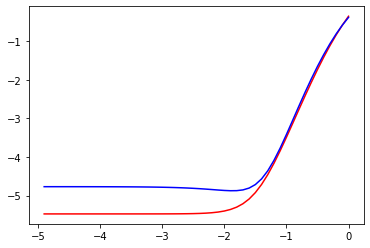

In [8]:
import matplotlib.pyplot as plt
tX = x_train
vX = x_test
tY = y_train
vY = y_test
tn  =  tX.shape[0]
vn  =  vX.shape[0]
tloss = [ ]
vloss = [ ]
index = -np.arange(0,5,0.1)
for i  in  index:
    w = ridgeregression(tX,tY,10**i)
    tloss = tloss + [np.sum((np.dot(tX , w)- tY )**2 ) / tn / 2 ]
    vloss = vloss + [np.sum((np.dot (vX , w)-vY )**2 ) / vn / 2 ]
    
training_loss = plt.plot(index,np.log(tloss),'r')
testing_loss = plt.plot(index,np.log(vloss),'b')

In [7]:
xvalues = testing_loss[0].get_xdata()
yvalues = testing_loss[0].get_ydata()

# val, index = find_nearest(crit,0)
# xvalues[index], yvalues[index]

### Minimum values lies -2<lambda<-1.5

### lambda = 10**-1.8

t = np.where( yvalues == min(yvalues)) #minimum lambda value
